# Decision Tree

* Você pode baixar o dataset em https://archive.ics.uci.edu/ml/datasets/Car+Evaluation.

In [1]:
import os
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("car_data.csv", header=None, names=headers)

data = data.sample(frac=1).reset_index(drop=True) # shuffle

No código acima, fizemos a leitura do arquivo informando que não há cabeçalho (obrigatório) e embaralhamos os dados.
A coluna 6 (0-6) representa a classe.

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,high,vhigh,2,more,big,high,unacc
1,high,med,3,4,big,low,unacc
2,high,low,3,2,big,med,unacc
3,med,low,3,more,med,high,vgood
4,med,vhigh,2,more,big,high,acc


In [4]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Um problema é que nossos atributos categóricos são strings, e a implementção de Decision Tree do scikit-learn só aceita atributos numéricos. Precisamos converter os atributos.

O Pandas possui um tipo de dados categórico ("category") que simplifica essa conversão.

In [5]:
for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True)
data.head()

,buying,maint,doors,persons,lug_boot,safety
class,,,,,,
2,0,3,0,2,0,0
2,0,2,1,1,0,1
2,0,1,1,0,0,2
3,2,1,1,2,1,0
0,2,3,0,2,0,0


Faremos a separação dos dados em conjunto de treino e teste

In [6]:
size = len(data)
train_size = int(math.floor(size * 0.7))
train_data = data[:train_size]
test_data = data[train_size:]

### Preparação de dados ok!
Vamos ao que interessa...

In [16]:
d_tree = DecisionTreeClassifier(criterion="entropy")
d_tree.fit(train_data, train_data.index) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
d_tree.predict(test_data.iloc[:, 0:6])
d_tree.score(test_data, test_data.index)

0.98265895953757221

In [18]:
# desenha a arvore
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]) 
graph = graphviz.Source(dot_data) 
graph.render("car_dataset")

ImportError: No module named graphviz

### Atividades

1. Utilizamos a medida de Entropia como fator de decisão (medida de impureza de um nó). Teste o mesmo conjunto 
randômico de dados para a medida Gini e compare os resultados.
Ref1.: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
Ref2.: https://en.wikipedia.org/wiki/Decision_tree_learning

2. Faça o balanceamento dos dados contidos em "train.csv", aplique o algoritmo de Decision Tree e faça a submissão no kaggle. Tente melhorar o resultado obtido em sala de aula (posição 3100 no leaderboard).
Dataset: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

3. (Opcional) Execute uma Random Forest na competição do Kaggle e veja se a acurácia melhora. Utilize 10, 100 ou 1000 árvores (dependendo de quanto o seu computador aguentar =]): http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html




1

In [35]:
d_tree = DecisionTreeClassifier(criterion="gini")
d_tree.fit(train_data, train_data.index)
d_tree.score(test_data, test_data.index)

0.98843930635838151

3

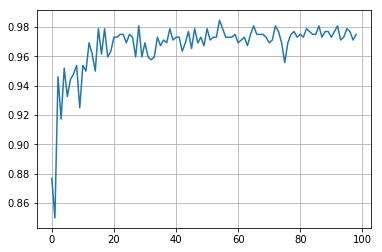

best acc: 0.985 with 54 trees


In [38]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

acc = []
for i in range(1,100):
    d_tree = RandomForestClassifier(n_estimators=i, criterion='gini')
    d_tree.fit(train_data, train_data.index)
    d_tree.predict(test_data.iloc[:, 0:6])
    acc.append(d_tree.score(test_data, test_data.index))
    

plt.plot(acc)
plt.grid()
plt.show()

print ("best acc: {:.3f} with {:d} trees".format(acc[np.argmax(acc)], np.argmax(acc)))